In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'
ds_bm5  = xr.open_dataset(dataPath + 'BedMachineGreenland-v5.nc')

# Convert metres to kms
ds_bm5['x'] = ds_bm5['x']*0.001
ds_bm5['y'] = ds_bm5['y']*0.001
xModel40       = np.arange(-72.,97.,4.0)*10
yModel40       = np.arange(-345.,-56.,4.0)*10

ds_bm5_40kms = xr.open_dataset(dataPath + 'bm5_data_40kms.nc')
ds_age_40kms = xr.open_dataset(dataPath + 'age_data_40kms.nc')
ds_surfvel_40kms = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')

modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka/'
ds_model = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_8point5CS_spinup_0ka0011.nc')

V_model = np.sum(ds_model["H"].data*ds_model["cell_area"].data)
V_data = np.sum(ds_bm5_40kms["H"].data*(ds_bm5_40kms["H"].data >= 0.0)*ds_model["cell_area"].data)

V_model, V_data

(2966808800000000.0, 2987707398458191.5)

In [3]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_tCS2 = xr.open_dataset("/scratch2/shreyas/tCS2/inexact_gn_hessian_cg/state_GNHessCG_iter_21.nc")
ds_model = xr.open_dataset("/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneCS_2/sico_out/N_grl40_bm5_paleo17a_nudged_CT4_BH0_SVC_m21ka_pkp/0007.nc")
ds_model_orig = xr.open_dataset("/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc")

mask_land = ds_model["mask"].data.copy()
mask_land[mask_land == 0] = -1
mask_land[mask_land == 1] = -1
mask_land[mask_land == 2] = 1
mask_land[mask_land == 3] = 1

mask_ice = ds_model["mask"].data.copy()
mask_ice[mask_ice == 0] = -1
mask_ice[mask_ice == 3] = -1
mask_ice[mask_ice == 1] = 1
mask_ice[mask_ice == 2] = 1

year2sec = 3.1556925445e+07
sec2year = 1 / year2sec

n_rows, n_cols = 2, 4
aspect_ratio = len(ds_tCS2['x'])/len(ds_tCS2['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

vx_data = ds_surfvel_40kms["vx"].data.copy()
vx_data[vx_data < -0.5e9] = np.nan
fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      vx_data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[0, 0])
ax[0, 0].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[0, 0].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")


fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      ds_model_orig["vx_s_g"].data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[0, 1])
ax[0, 1].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[0, 1].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      ds_model["vx_s_g"].data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[0, 2])
ax[0, 2].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[0, 2].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      ds_model["vx_s_g"].data - ds_model_orig["vx_s_g"].data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[0, 3])
ax[0, 3].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[0, 3].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

vy_data = ds_surfvel_40kms["vy"].data.copy()
vy_data[vy_data < -0.5e9] = np.nan
fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      vy_data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[1, 0])
ax[1, 0].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[1, 0].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")


fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      ds_model_orig["vy_s_g"].data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[1, 1])
ax[1, 1].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[1, 1].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      ds_model["vy_s_g"].data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[1, 2])
ax[1, 2].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[1, 2].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

fancyPlotter.plot_log(ds_tCS2['x'], ds_tCS2['y'], 
                      ds_model["vy_s_g"].data - ds_model_orig["vy_s_g"].data, 
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4], 
                      fig = fig, ax = ax[1, 3])
ax[1, 3].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_land, levels=[0], color="black")
ax[1, 3].contour(ds_tCS2['x'], 
                 ds_tCS2['y'],
                 mask_ice, levels=[0], color="black", linestyles = "dashed")

plt.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: '/home/shreyas/update_to_develop_sicopolis/sicopolis_tuneCS_2/sico_out/N_grl40_bm5_paleo17a_nudged_CT4_BH0_SVC_m21ka_pkp/0007.nc'

In [ ]:
0.5*np.sum((ds_surfvel_40kms["vx"].data - ds_model_orig["vx_s_g"].data)**2/ ds_surfvel_40kms["vx_uncert"].data**2), 0.5*np.sum((ds_surfvel_40kms["vy"].data - ds_model_orig["vy_s_g"].data)**2/ ds_surfvel_40kms["vy_uncert"].data**2)

In [ ]:
0.5*np.sum((ds_surfvel_40kms["vx"].data - ds_model["vx_s_g"].data)**2/ ds_surfvel_40kms["vx_uncert"].data**2), 0.5*np.sum((ds_surfvel_40kms["vy"].data - ds_model["vy_s_g"].data)**2/ ds_surfvel_40kms["vy_uncert"].data**2)

NameError: name 'mask_land' is not defined

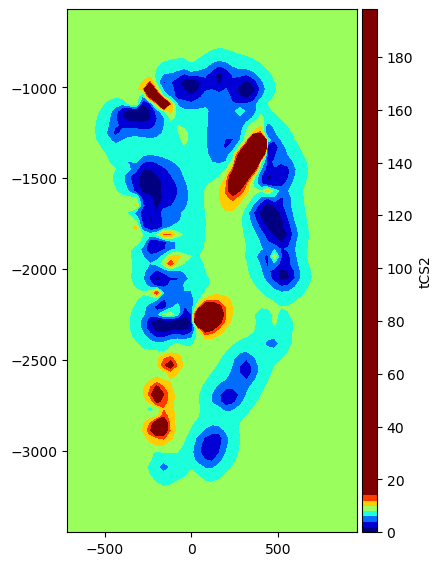

In [4]:
n_rows, n_cols = 1, 1
aspect_ratio = len(ds_tCS2['x'])/len(ds_tCS2['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(ds_tCS2['x'], ds_tCS2['y'], 
                         10**ds_tCS2["xx_c_slide_init"],
                         cmap = 'jet', vmin = 2, vmax = 15,
                         cbar_label = 'tCS2', fig = fig, ax = ax)
ax.contour(ds_tCS2['x'], 
           ds_tCS2['y'],
           mask_land, levels=[0], color="black")
ax.contour(ds_tCS2['x'], 
           ds_tCS2['y'],
           mask_ice, levels=[0], color="black", linestyles = "dashed")

In [ ]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_A1_0 = xr.open_dataset("/scratch2/shreyas/tA1/inexact_gn_hessian_cg/state_GNHessCG_iter_0.nc")
ds_A1 = xr.open_dataset("/scratch2/shreyas/tA1/inexact_gn_hessian_cg/state_GNHessCG_iter_4.nc")

In [ ]:
ds_A1

In [ ]:
n_rows, n_cols = 1, 1
aspect_ratio = len(ds_tCS2['x'])/len(ds_tCS2['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

fancyPlotter.plot_normal(ds_tCS2['x'], ds_tCS2['y'], 
                         ds_A1["xx_delta_tda"][1],
                         cmap = 'jet',
                         cbar_label = 'tCS2', fig = fig, ax = ax)